<h1 align='center'> ANÁLISIS EXPLORATORIO DE LOS DATOS DEL TITANIC </h1>

## LIBRERÍAS 

In [1]:
#!pip install seaborn 
#!pip install missingno

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

## BASE DE DATOS

In [2]:
data = pd.read_csv('C://Users//Cristian Miranda//Google Drive//AI Saturday//Titanic//Titanic_Project//Data//train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### IDENTIFICACIÓN DE VARIABLES

In [3]:
#Dimensión de la base
print("Filas:",data.shape[0], "\nColumnas: ",data.shape[1] )

Filas: 891 
Columnas:  12


In [4]:
#Tipo de variables:
pd.DataFrame(data.dtypes).rename({0:"Tipo"}, axis='columns')

,Tipo
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
# Estadística descriptiva de la base
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


La base de datos cuenta con 12 variables para 891 individos. Las variables se describen a continuación: 
<ul style="list-style-type:square;">
    <li><b>PassengerId:</b> Identificador de los pasajeros <i>(Numérica)</i> </li> 

<li><b>Survived:</b> Variable binaria que si toma el valor de 1 significa que el individuo sobrevivió y si toma el valor de 0 no tuvo la misma suerte <i>(Numérica/Binaria)</i></li>

<li><b>Pclass:</b> Clase de abordaje del ticket. Puede ser desde 1: 1a clase, 2: segunda clase y 3: tercera clase <i>(Numérica/categórica)</i> </li>

<li><b>Name:</b> Nombre del pasajero <i>(Texto)</i></li>

<li><b>Sex:</b></b> Sexo del pasajero <i>(Texto/categórica)</i></li>

<li><b>Age:</b> edad del pasajero <i>(Numérica)</i></li>

<li><b>SipSp:</b> total de hermanas / cónyuges que acompañan al pasajero en el barco <i>(Numérica)</i></li>

<li><b>Parch:</b> numero de padres / hijos que acompañan al pasajero en el barco <i>(Numérica/categórica)</i></li>

<li><b>Ticket:</b> Numero de ticket <i>(Texto)</i></li>

<li><b>Fare:</b> Tarífa del pasajero <i>(Numérica)</i></li>

<li><b>Cabin:</b> Número de cabina <i>(Numérica/categórica)</i></li>

<li><b>embarked:</b> Puerto de enbarque. Existen 3: C = Cherbourg, Q = Queenstown y S = Southampton <i>(Texto/categórica)</i></li>
</ul>

### DATOS PERDIDOS

In [6]:
#Tabla de valores perdidos
nulo = pd.DataFrame(data.isnull().sum()).rename({0:"Total"}, axis='columns') 
nulo['Porcentaje'] = (nulo.Total*100/len(data)).round(2)
nulo.sort_values(by=['Total'], inplace=True, ascending=False)
nulo

,Total,Porcentaje
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


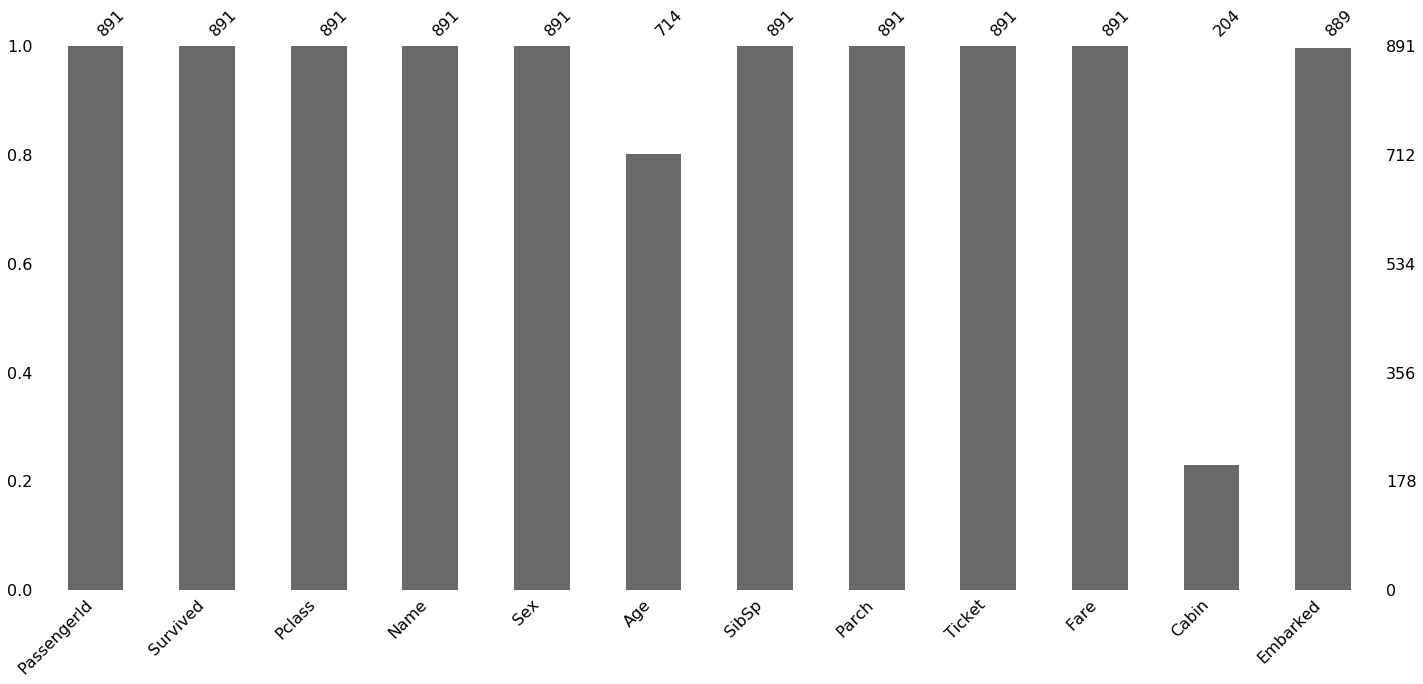

In [7]:
msno.bar(data)

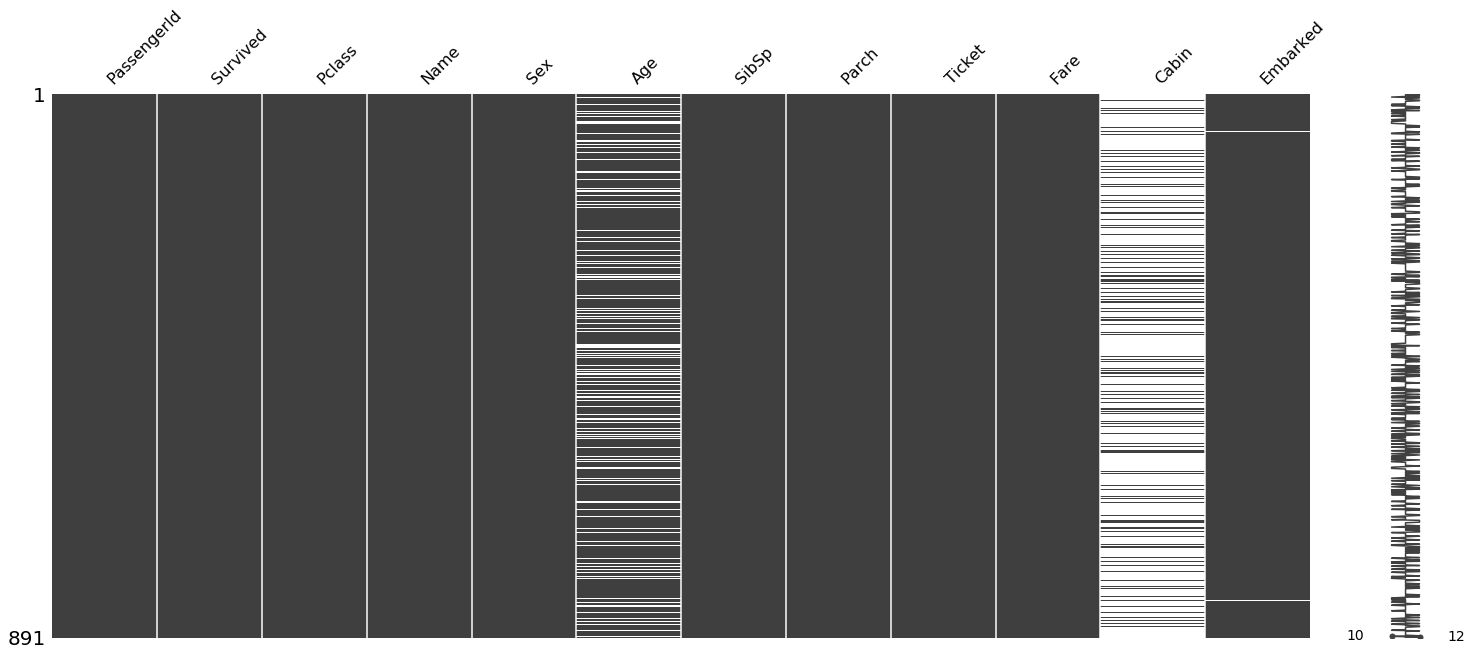

In [8]:
msno.matrix(data)

La variable __cabin__ tiene un __77%__ de datos perdidos por lo que se puede omitir para el análisis. Para la variable __Age__ esta debe ser tomanda encuenta considerando algún criterio para completar los valores perdidos que son un __20%__

### DESCRIPTIVOS

##### SOBREVIVIENTES POR CLASE DE ABORDAJE

Text(0, 0.5, 'Total')

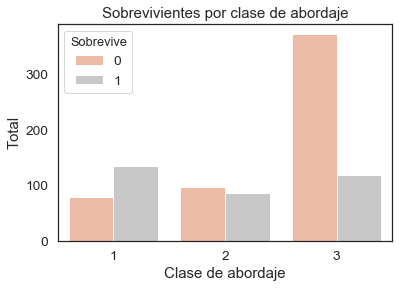

In [9]:
sns.set(style="white",font_scale=1.25)
sns.countplot(x="Pclass", hue="Survived", data=data, palette="RdGy").get_legend().set_title("Sobrevive")
plt.title("Sobrevivientes por clase de abordaje")
plt.xlabel('Clase de abordaje')
plt.ylabel('Total')

Al parecer, las personas que más sobreviven son las que compraron un ticket de primera clase. Los más desafortunados son los pasajeros de la tercera clase.

##### SOBREVIVIENTES POR SEXO Y EDAD

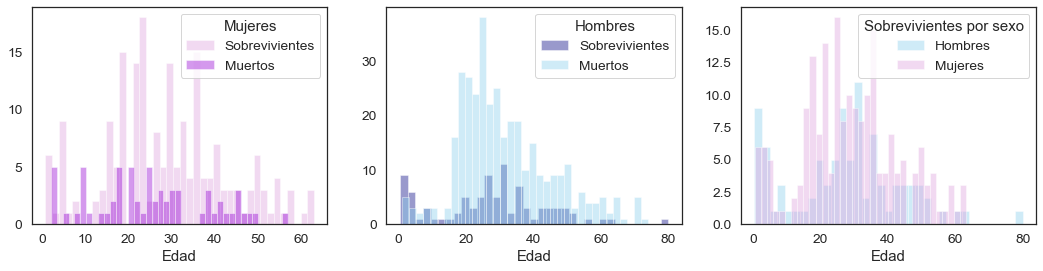

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18, 4))

# Mujeres
ax = sns.distplot(data[(data['Sex']=='female') & (data['Survived']==1)].Age.dropna(), kde=False,label='Sobrevivientes', bins=40, color="Plum",axlabel="Edad",ax = axes[0])
ax = sns.distplot(data[(data['Sex']=='female') & (data['Survived']==0)].Age.dropna(), kde=False,label='Muertos', bins=40, color="Darkviolet",axlabel="Edad",ax = axes[0]).legend()
ax.set_title('Mujeres')

# Hombres
ax = sns.distplot(data[(data['Sex']=='male') & (data['Survived']==1)].Age.dropna(),kde=False,label='Sobrevivientes', bins=35,color="Navy",axlabel="Edad",ax = axes[1])
ax = sns.distplot(data[(data['Sex']=='male') & (data['Survived']==0)].Age.dropna(),kde=False,label='Muertos', bins=35,color="SkyBlue",axlabel="Edad",ax = axes[1]).legend()
ax.set_title('Hombres')

# H VS M
ax = sns.distplot(data[(data['Sex']=='male') & (data['Survived']==1)].Age.dropna(),  kde=False,label='Hombres', bins=35,axlabel="Edad",color="SkyBlue",ax = axes[2])
ax = sns.distplot(data[(data['Sex']=='female') & (data['Survived']==1)].Age.dropna(), kde=False,label='Mujeres', bins=35, color="Plum",axlabel="Edad",ax = axes[2]).legend()
ax.set_title('Sobrevivientes por sexo')

Las mujeres que más tienen suerte de sobrevivir, son las mejores de 5 años y entre el rango de 20 a 35 años.
Para los hombres en su mayoría, su desenlace es la muerte los unicos que logran sobrevivir son los menores de 5 años y los de entre 25 y 35 años. En términos generales, las mujeres son más privilegiadas pues tienen una mayor probabilidad de sobrevivir.

##### SOBREVIVIENTES POR FAMILIA Y TARIFA

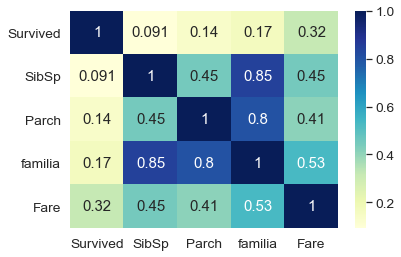

In [19]:
data["familia"]= data.SibSp + data.Parch
corr = data[["Survived","SibSp","Parch","familia","Fare"]].corr(method='spearman')

sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
           annot=True)

El gráfico anterior, permite identificar gracias a la variable *'Tarifa'* , que la condición económica esta correlacionada postivamente con la posibilidad de sobrevivir. Aunque el numero de integrantes de la familia también afecta positivamente aunque surge la pregunta del ¿Porqué?.

##### SOBREVIVIENTES POR FAMILIA Y TARIFA

In [20]:
sns.catplot(x="familia", y="Survived", hue="Embarked", kind="point", data=data[data['Embarked'].notnull()], aspect = 3,
                 palette={"S": "green", "C":"blue","Q":"red"},
                 markers=["^", "o","*"], linestyles=["-", "--","-"])

KeyError: 0

Al parecer, las personas que tienen mayor probabilidad de sobrevivir son las que ingresan por el puerto de enbarque C = Cherbourg. Además familias de entre 0 y 3 integrantes tienen mejor suerte de salir con vida.

### TRATAMIENTO DE VARIABLES

In [13]:
# Edad
print("La media es: ", data["Age"].mean())
print("La mediana es: ", data["Age"].median())

data["Age"] = data["Age"].fillna(data["Age"].mean()).astype(int)

La media es:  29.69911764705882
La mediana es:  28.0


In [14]:
# Sexo
data["Mujer"] = 1
data.loc[data['Sex']=="male", 'Mujer'] = 0

In [15]:
# Embarque
data['Embarked'].describe()
# Si se elimina:
data = data[data['Embarked'].notnull()]

#Si se incluye con categoria más frecuente
#data['Embarked'] = dataset['Embarked'].fillna('S')

# Hacer una sola categoria
data['Embarked'] = data['Embarked'].replace({"S": 0, "C": 1, "Q": 2})

In [21]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familia,Mujer
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,0,0,0
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,2,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,0,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,0,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,1,1,1


In [24]:
data[["Survived","Age","Mujer","familia","Pclass","Embarked"]].head()

,Survived,Age,Mujer,familia,Pclass,Embarked
0,0,22,0,1,3,0
1,1,38,1,1,1,1
2,1,26,1,0,3,0
3,1,35,1,1,1,0
4,0,35,0,0,3,0


### Fuente
- [Analyze the data through data visualization using Seaborn](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)
- [Histograms and Density Plots in Python](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
- [How to Make a Seaborn Barplot](https://www.sharpsightlabs.com/blog/seaborn-barplot/)
- [The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial)
- [Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)
- [Python and R Tips](https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/)
- [seaborn.countplot](http://alanpryorjr.com/visualizations/seaborn/countplot/countplot/)
- [Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)
- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/)
- [Predicting the Survival of Titanic Passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)